# Question and Answers:

## Q1. Your views about the problem statement?

a) The problem statement revolves around creating a machine learning model to predict rainfall in Sydney using various classification models, including decision trees and ensemble methods. The dataset provided contains weather information from 2008 to 2017, with features such as temperature, humidity, pressure, and rainfall itself.Predicting rainfall accurately is crucial for various sectors such as agriculture, transportation, and disaster management. Therefore, the problem statement addresses a practical and relevant issue.

## Q2. What will be your approach to solving this task?

a)  i)Load the data into a dataframe

  ii)Perform initial exploratory data analysis (EDA) to understand the structure of the data,check for missing values,          outliers,skewness and distributions of features.

iii)Taking average of similar data variables to represent it as single variable.

iv)Handle missing values, outliers and skewness if any and convert categorical variables into numerical representations. 

v)Split the data into training and testing sets for model evaluation.

vi)Train multiple classification models, evaluating them using appropriate metrics, such as accuracy,confusion   matrix,precision_score, recall_score and roc_auc_score.

vii)Select the model with the best accuracy.

viii)Suggest ways to further improve the accuracy of the chosen model.

## Q3. What were the available ML model options you had to perform this task?

a) Available models are: i)Simple Logistic Regression
                         ii)Multiple Logistic Regression
                         iii)Linear Discriminant Analysis
                         iv)KNN Classifier
                         v)Decision Tree
                         vi)Bagging
                         vii)Random Forest
                         viii)Boosting

## Q4.Which model’s performance is best and what could be the possible reason for that?

a)The best models are Linear Discriminant Analysis Model and Bagging Classifier based on the accuracy score whic is '0.8338323353293413' for both the models. So if we have to choose a model between these two we will select the model with high roc_auc_score which gives area under roc curve value. Linear Discriminant Analysis has higher roc_auc_score than Bagging Classifier which is '0.7392184172545695'. So we choose LDA as the best classification model for this task.

## Q5.What steps can you take to improve this selected model’s performance even further?

a) Using techniques like Grid Search or Random Search to explore a range of hyperparameter values.
   Important hyperparameters include the number of trees (n_estimators), maximum depth of trees (max_depth), minimum samples per    leaf (min_samples_leaf), and others.
   Experiment with different combinations to find the optimal set of hyperparameters.

# Project:

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sn
from scipy.stats import skew
import statsmodels.discrete.discrete_model as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from IPython.display import Image
import pydotplus
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb

### Creating Dataframe and loading it with data

In [2]:
#Creating a dataframe named 'df' and loading data from file into it using pandas library
#File is indicated by giving the file path
#header=0 represents that the first row has the headers of the data
df=pd.read_excel('C:/Users/KALLEPU/Downloads/sydney_rain prediction.xlsx', header=0)

In [3]:
#Representing the data inside dataframe 'df'
df.head()
#By default it shows only 5 rows of the dataframe and we can include the number to represent desired number of rows

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
1 2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
2 2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
3 2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
4 2008-02-05   Sydney     19.7     25.7      77.4          NaN       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  
0     20.7     20.9       Yes          Yes  
1     22.4     24.8       Yes          Yes  
2     23.5     23.0       Yes          Yes  
3     21.4     20.9       Yes          Yes  
4     22.5     25.5       Yes          Yes

#### As we have to predict the rain tomorrow using the data we can say that 'RainTomorrow' column is dependant variable and others are independant

# Data preprocessing

## EDA

In [4]:
#below command describes each variable in its count,mean,standard deviation,minimum value,maximum value,median etc
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  3334.000000  3335.000000  3331.000000  3286.000000  3321.000000   
mean     14.865057    23.002339     3.330231     5.187432     7.179374   
std       4.553641     4.494638     9.895172     2.777407     3.810886   
min       4.300000    11.700000     0.000000     0.000000     0.000000   
25%      11.000000    19.600000     0.000000     3.200000     4.300000   
50%      14.900000    22.800000     0.000000     4.800000     8.300000   
75%      18.700000    26.000000     1.400000     7.000000    10.200000   
max      27.600000    45.800000   119.400000    18.400000    13.600000   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  3323.000000  3324.000000  3317.000000  3318.000000  2771.000000   
mean     68.229010    54.699158  1018.346156  1016.018774     4.181523   
std      15.085355    16.293530     7.021571     7.032211     2.749578   
min      19.000000    10.000000   986.700000   989.800000     0.000000   
25%      58.000000    44.000000  1013.700000  1011.300000     1.000000   
50%      69.000000    56.000000  1018.600000  1016.300000     5.000000   
75%      80.000000    65.000000  1023.100000  1020.800000     7.000000   
max     100.000000    99.000000  1039.000000  1036.700000     9.000000   

          Cloud3pm      Temp9am      Temp3pm  
count  2776.000000  3333.000000  3333.000000  
mean      4.218660    17.819742    21.533333  
std       2.641885     4.897177     4.303737  
min       0.000000     6.400000    10.200000  
25%       1.000000    13.800000    18.400000  
50%       4.000000    18.200000    21.300000  
75%       7.000000    21.700000    24.500000  
max       8.000000    36.500000    44.700000

In [5]:
#below command gives count of non-null values and datatypes of each varible in df dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

#### There are missing values in MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, Humidity9am, Humidity3pm, Pressure9am,  Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm, RainToday, RainTomorrow variables. so the null values have to be filled with mean,median or mode value of the variable data accordingly.

In [6]:
#The below command fillna fills the missing values of 'MinTemp' with the mean of the column MinTemp
df.MinTemp=df.MinTemp.fillna(df.MinTemp.mean())
#now there will be no null values and average is also not changed

In [7]:
#The below command fillna fills the missing values of 'MaxTemp' with the mean of the column MaxTemp
df.MaxTemp=df.MaxTemp.fillna(df.MaxTemp.mean())
#now there will be no null values and average is also not changed

In [8]:
#The below command fillna fills the missing values of 'Rainfall' with the mean of the column Rainfall
df.Rainfall=df.Rainfall.fillna(df.Rainfall.mean())
#now there will be no null values and average is also not changed

In [9]:
#The below command fillna fills the missing values of 'Evaporation' with the mean of the column Evaporation
df.Evaporation=df.Evaporation.fillna(df.Evaporation.mean())
#now there will be no null values and average is also not changed

In [10]:
#The below command fillna fills the missing values of 'Sunshine' with the mean of the column Sunshine
df.Sunshine=df.Sunshine.fillna(df.Sunshine.mean())
#now there will be no null values and average is also not changed

In [11]:
#The below command fillna fills the missing values of 'Humidity9am' with the mean of the column 'Humidity9am'
df.Humidity9am=df.Humidity9am.fillna(df.Humidity9am.mean())
#now there will be no null values and average is also not changed

In [12]:
#The below command fillna fills the missing values of 'Humidity3pm' with the mean of the column Humidity3pm
df.Humidity3pm=df.Humidity3pm.fillna(df.Humidity3pm.mean())
#now there will be no null values and average is also not changed

In [13]:
#The below command fillna fills the missing values of 'Pressure9am' with the mean of the column Pressure9am
df.Pressure9am=df.Pressure9am.fillna(df.Pressure9am.mean())
#now there will be no null values and average is also not changed

In [14]:
#The below command fillna fills the missing values of 'Pressure3pm' with the mean of the column Pressure3pm
df.Pressure3pm=df.Pressure3pm.fillna(df.Pressure3pm.mean())
#now there will be no null values and average is also not changed

In [15]:
#The below command fillna fills the missing values of 'Cloud9am' with the mean of the column Cloud9m
df.Cloud9am=df.Cloud9am.fillna(df.Cloud9am.mean())
#now there will be no null values and average is also not changed

In [16]:
#The below command fillna fills the missing values of 'Cloud3pm' with the mean of the column Cloud3pm
df.Cloud3pm=df.Cloud3pm.fillna(df.Cloud3pm.mean())
#now there will be no null values and average is also not changed

In [17]:
#The below command fillna fills the missing values of 'Temp9am' with the mean of the column Temp9am
df.Temp9am=df.Temp9am.fillna(df.Temp9am.mean())
#now there will be no null values and average is also not changed

In [18]:
#The below command fillna fills the missing values of 'Temp3pm' with the mean of the column Temp3pm
df.Temp3pm=df.Temp3pm.fillna(df.Temp3pm.mean())
#now there will be no null values and average is also not changed

In [19]:
#The below command fillna fills the missing values of 'RainToday' with the mode of the column RainToday
df.RainToday=df.RainToday.fillna(df.RainToday.mode())
#now there will be no null values and mode is also not changed

In [20]:
#The below command fillna fills the missing values of 'RainTomorrow' with the mode of the column RainTomorrow
df.RainTomorrow=df.RainTomorrow.fillna(df.RainTomorrow.mode())
#now there will be no null values and mode is also not changed

In [21]:
df.info()
# we can see that there are no null values now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3337 non-null   float64       
 3   MaxTemp       3337 non-null   float64       
 4   Rainfall      3337 non-null   float64       
 5   Evaporation   3337 non-null   float64       
 6   Sunshine      3337 non-null   float64       
 7   Humidity9am   3337 non-null   float64       
 8   Humidity3pm   3337 non-null   float64       
 9   Pressure9am   3337 non-null   float64       
 10  Pressure3pm   3337 non-null   float64       
 11  Cloud9am      3337 non-null   float64       
 12  Cloud3pm      3337 non-null   float64       
 13  Temp9am       3337 non-null   float64       
 14  Temp3pm       3337 non-null   float64       
 15  RainToday     3331 non-null   object  

## Visualizations

<AxesSubplot:xlabel='Location', ylabel='count'>

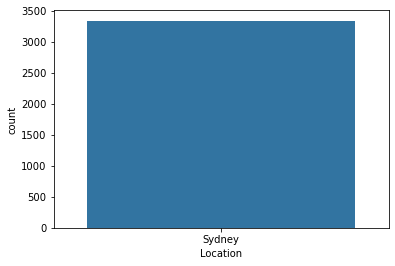

In [22]:
#Countplot of Location data in 'df'
sns.countplot(x='Location',data=df)

In [23]:
#As there is only a single value 'Sydney' in the column 'Location' it won't effect the output. So the column can be deleted
del df['Location']
#Location varible is deleted

In [24]:
#As the 'date' data is not needed to predict the output it can be deleted
del df['Date']
#Date varible is deleted

### As there are multiple columns delivering same type of data we can take the average of them for simplicity

In [25]:
#below we are taking the average of similar data representing columns and showing it in a new column.
df['Avg_Humidity']=(df['Humidity9am']+df['Humidity3pm'])/2
df['Avg_Pressure']=(df['Pressure9am']+df['Pressure3pm'])/2
df['Avg_Cloud']=(df['Cloud9am']+df['Cloud3pm'])/2
df['Avg_Temp']=(df['Temp9am']+df['Temp3pm'])/2
df['Med_Temp']=(df['MinTemp']+df['MaxTemp'])/2
#now the new columns created are 'Avg_Humidity', 'Avg_Pressure', 'Avg_Cloud', 'Avg_Temp', 'Med_Temp'

In [26]:
df.describe()
#It gives the EDD of every column in the dataframe including the new average columns we created

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  3337.000000  3337.000000  3337.000000  3337.000000  3337.000000   
mean     14.865057    23.002339     3.330231     5.187432     7.179374   
std       4.551593     4.493290     9.886270     2.756095     3.801737   
min       4.300000    11.700000     0.000000     0.000000     0.000000   
25%      11.000000    19.600000     0.000000     3.200000     4.300000   
50%      14.900000    22.800000     0.000000     4.800000     8.200000   
75%      18.700000    26.000000     1.400000     7.000000    10.200000   
max      27.600000    45.800000   119.400000    18.400000    13.600000   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  3337.000000  3337.000000  3337.000000  3337.000000  3337.000000   
mean     68.229010    54.699158  1018.346156  1016.018774     4.181523   
std      15.053668    16.261752     7.000492     7.012157     2.505491   
min      19.000000    10.000000   986.700000   989.800000     0.000000   
25%      58.000000    44.000000  1013.800000  1011.300000     2.000000   
50%      69.000000    56.000000  1018.500000  1016.300000     4.181523   
75%      80.000000    64.000000  1023.100000  1020.800000     7.000000   
max     100.000000    99.000000  1039.000000  1036.700000     9.000000   

          Cloud3pm      Temp9am      Temp3pm  Avg_Humidity  Avg_Pressure  \
count  3337.000000  3337.000000  3337.000000   3337.000000   3337.000000   
mean      4.218660    17.819742    21.533333     61.464084   1017.182465   
std       2.409531     4.894240     4.301156     14.258961      6.936721   
min       0.000000     6.400000    10.200000     15.500000    988.850000   
25%       2.000000    13.800000    18.400000     52.500000   1012.650000   
50%       4.218660    18.200000    21.300000     62.000000   1017.350000   
75%       7.000000    21.700000    24.500000     71.000000   1021.950000   
max       8.000000    36.500000    44.700000     96.000000   1037.400000   

         Avg_Cloud     Avg_Temp     Med_Temp  
count  3337.000000  3337.000000  3337.000000  
mean      4.200091    19.676538    18.933698  
std       2.204337     4.397214     4.255316  
min       0.000000     9.300000     9.400000  
25%       2.500000    16.150000    15.450000  
50%       4.200091    19.700000    18.900000  
75%       6.000000    23.000000    22.300000  
max       8.000000    37.300000    33.750000

In [27]:
#As the new average columns ae created we can delete the old columns which are not useful
del df['Humidity9am']
del df['Humidity3pm']
del df['Pressure9am']
del df['Pressure3pm']
del df['Cloud9am']
del df['Cloud3pm']
del df['Temp9am']
del df['Temp3pm']
del df['MinTemp']
del df['MaxTemp']
#the above mentioned columns are deleted

In [28]:
df.head()
#it gives the data in every column and only 5 rows by default

Rainfall  Evaporation  Sunshine RainToday RainTomorrow  Avg_Humidity  \
0      15.6     6.200000       0.0       Yes          Yes          88.0   
1       6.0     3.400000       2.7       Yes          Yes          78.0   
2       6.6     2.400000       0.1       Yes          Yes          87.0   
3      18.8     2.200000       0.0       Yes          Yes          86.5   
4      77.4     5.187432       0.0       Yes          Yes          81.0   

   Avg_Pressure  Avg_Cloud  Avg_Temp  Med_Temp  
0       1017.50        8.0     20.80     20.95  
1       1017.15        7.0     23.60     22.55  
2       1016.15        7.5     23.25     23.05  
3       1013.00        8.0     21.15     21.50  
4       1006.55        8.0     24.00     22.70

In [29]:
df.describe()
#Now we can see the EDD of the variables after deleting unwanted columns

Rainfall  Evaporation     Sunshine  Avg_Humidity  Avg_Pressure  \
count  3337.000000  3337.000000  3337.000000   3337.000000   3337.000000   
mean      3.330231     5.187432     7.179374     61.464084   1017.182465   
std       9.886270     2.756095     3.801737     14.258961      6.936721   
min       0.000000     0.000000     0.000000     15.500000    988.850000   
25%       0.000000     3.200000     4.300000     52.500000   1012.650000   
50%       0.000000     4.800000     8.200000     62.000000   1017.350000   
75%       1.400000     7.000000    10.200000     71.000000   1021.950000   
max     119.400000    18.400000    13.600000     96.000000   1037.400000   

         Avg_Cloud     Avg_Temp     Med_Temp  
count  3337.000000  3337.000000  3337.000000  
mean      4.200091    19.676538    18.933698  
std       2.204337     4.397214     4.255316  
min       0.000000     9.300000     9.400000  
25%       2.500000    16.150000    15.450000  
50%       4.200091    19.700000    18.900000  
75%       6.000000    23.000000    22.300000  
max       8.000000    37.300000    33.750000

### For training the models we should have all the data in numerical format to make it easy for calculation. So categorical variables like 'RainToday' an 'RainTomorrow' must be chnaged to numerical data

In [30]:
#we hae get dummies function which is easier to get dummy varibles with numerical value for the categorical data in a varibale
pd.get_dummies(df,columns=['RainToday'],drop_first=True)
#The above command represents data along with dummy variables of 'RainToday' variable i.e 'RainToday_No' and 'RainToday_No'
#As we have given drop_first=True condition it drops 'RainToday_No' column

Rainfall  Evaporation  Sunshine RainTomorrow  Avg_Humidity  \
0         15.6     6.200000       0.0          Yes          88.0   
1          6.0     3.400000       2.7          Yes          78.0   
2          6.6     2.400000       0.1          Yes          87.0   
3         18.8     2.200000       0.0          Yes          86.5   
4         77.4     5.187432       0.0          Yes          81.0   
...        ...          ...       ...          ...           ...   
3332       0.0     2.000000       7.8           No          62.5   
3333       0.0     2.000000       9.2           No          65.5   
3334       0.0     2.400000       2.7           No          70.5   
3335       0.0     1.400000       9.3           No          45.5   
3336       0.0     3.400000       9.4           No          52.5   

      Avg_Pressure  Avg_Cloud  Avg_Temp  Med_Temp  RainToday_Yes  
0          1017.50        8.0     20.80     20.95              1  
1          1017.15        7.0     23.60     22.55              1  
2          1016.15        7.5     23.25     23.05              1  
3          1013.00        8.0     21.15     21.50              1  
4          1006.55        8.0     24.00     22.70              1  
...            ...        ...       ...       ...            ...  
3332       1025.60        2.0     14.20     14.10              0  
3333       1026.55        2.0     14.85     14.25              0  
3334       1017.90        6.0     13.75     13.55              0  
3335       1016.20        3.5     15.70     14.70              0  
3336       1017.00        1.0     14.10     13.45              0  

[3337 rows x 10 columns]

In [31]:
#Now we equate the represented data to the data frame
df=pd.get_dummies(df,columns=['RainToday'],drop_first=True)

In [32]:
#we hae get dummies function which is easier to get dummy varibles with numerical value for the categorical data in a varibale
pd.get_dummies(df,columns=['RainTomorrow'],drop_first=True)
#The above command represents data along with dummy variables of 'RainTomorrow' variable i.e 'RainTomorrow_No' and 'RainTomorrow_No'
#As we have given drop_first=True condition it drops 'RainTomorrow_No' column

Rainfall  Evaporation  Sunshine  Avg_Humidity  Avg_Pressure  Avg_Cloud  \
0         15.6     6.200000       0.0          88.0       1017.50        8.0   
1          6.0     3.400000       2.7          78.0       1017.15        7.0   
2          6.6     2.400000       0.1          87.0       1016.15        7.5   
3         18.8     2.200000       0.0          86.5       1013.00        8.0   
4         77.4     5.187432       0.0          81.0       1006.55        8.0   
...        ...          ...       ...           ...           ...        ...   
3332       0.0     2.000000       7.8          62.5       1025.60        2.0   
3333       0.0     2.000000       9.2          65.5       1026.55        2.0   
3334       0.0     2.400000       2.7          70.5       1017.90        6.0   
3335       0.0     1.400000       9.3          45.5       1016.20        3.5   
3336       0.0     3.400000       9.4          52.5       1017.00        1.0   

      Avg_Temp  Med_Temp  RainToday_Yes  RainTomorrow_Yes  
0        20.80     20.95              1                 1  
1        23.60     22.55              1                 1  
2        23.25     23.05              1                 1  
3        21.15     21.50              1                 1  
4        24.00     22.70              1                 1  
...        ...       ...            ...               ...  
3332     14.20     14.10              0                 0  
3333     14.85     14.25              0                 0  
3334     13.75     13.55              0                 0  
3335     15.70     14.70              0                 0  
3336     14.10     13.45              0                 0  

[3337 rows x 10 columns]

In [33]:
#Now we equate the represented data to the data frame
df=pd.get_dummies(df,columns=['RainTomorrow'],drop_first=True)
#Now the dependant variable is 'RainTomorroe_Yes' and others are independant

In [34]:
df.describe()
#It gives EDD of all variables in the dataframe

Rainfall  Evaporation     Sunshine  Avg_Humidity  Avg_Pressure  \
count  3337.000000  3337.000000  3337.000000   3337.000000   3337.000000   
mean      3.330231     5.187432     7.179374     61.464084   1017.182465   
std       9.886270     2.756095     3.801737     14.258961      6.936721   
min       0.000000     0.000000     0.000000     15.500000    988.850000   
25%       0.000000     3.200000     4.300000     52.500000   1012.650000   
50%       0.000000     4.800000     8.200000     62.000000   1017.350000   
75%       1.400000     7.000000    10.200000     71.000000   1021.950000   
max     119.400000    18.400000    13.600000     96.000000   1037.400000   

         Avg_Cloud     Avg_Temp     Med_Temp  RainToday_Yes  RainTomorrow_Yes  
count  3337.000000  3337.000000  3337.000000    3337.000000       3337.000000  
mean      4.200091    19.676538    18.933698       0.259515          0.259215  
std       2.204337     4.397214     4.255316       0.438434          0.438269  
min       0.000000     9.300000     9.400000       0.000000          0.000000  
25%       2.500000    16.150000    15.450000       0.000000          0.000000  
50%       4.200091    19.700000    18.900000       0.000000          0.000000  
75%       6.000000    23.000000    22.300000       1.000000          1.000000  
max       8.000000    37.300000    33.750000       1.000000          1.000000

### We can see that column 'Rainfall' has mean value more than median which may represent right skewness of the data and the maximum value is also very high which may represent outliers in the data so it needs to be treated.

In [35]:
#Lets see the skewness of each varible in the df dataframe
for col in df:
    print('skewness of',col,'=',skew(df[col]))
#It is a for loop which prints skewness of each variable in df

skewness of Rainfall = 5.368732942018318
skewness of Evaporation = 0.6552565977625819
skewness of Sunshine = -0.5408278934638983
skewness of Avg_Humidity = -0.22622155533901975
skewness of Avg_Pressure = -0.15465499662609797
skewness of Avg_Cloud = -0.051870944875796215
skewness of Avg_Temp = 0.2014567422901707
skewness of Med_Temp = 0.16892426850365325
skewness of RainToday_Yes = 1.097184637340583
skewness of RainTomorrow_Yes = 1.0989643133692852


### As we suspected 'Rainfall' column has very high positive skewness which needs to be reduced. And coming to other variables the skewness is between -2 to 2 which is acceptable

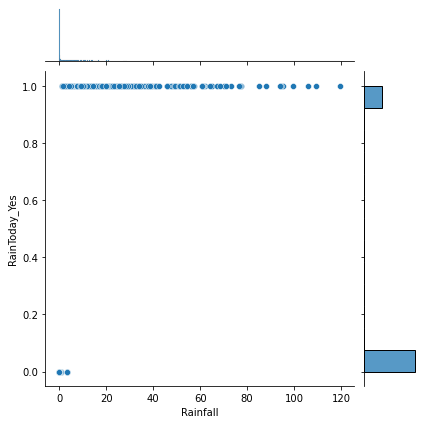

In [36]:
#Let's plot a scatter plot of data 'Rainfall' and 'RainToday_Yes'
sns.jointplot(x='Rainfall',y='RainToday_Yes',data=df)

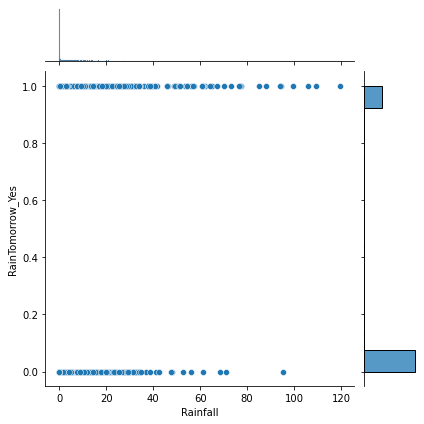

In [37]:
#Let's plot a scatter plot of data 'Rainfall' and 'RainTomorrow_Yes'
sns.jointplot(x='Rainfall',y='RainTomorrow_Yes',data=df)

C:\Users\KALLEPU\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

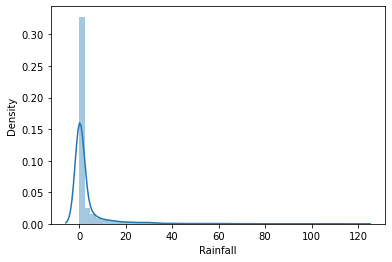

In [38]:
#Let's plot displot of 'Rainfall' data
sns.distplot(df.Rainfall)
#we can see that the data is right skewed

C:\Users\KALLEPU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rainfall'>

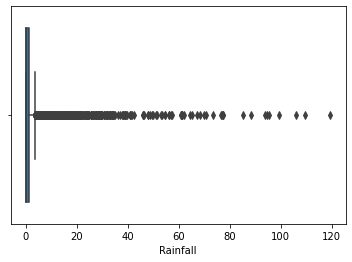

In [39]:
#Let's plot boxplot of 'Rainfall' data
sns.boxplot(df['Rainfall'])

#### Before we correct the skewness we need to check it's correlation with dependant variable. If it has high correlation it may impact the output upon changing the skewness

In [40]:
#Get correlation of each variable with the other using below command
df.corr()
#we can see that 'Rainfall' variable has very low correlation with dependant variable 

Rainfall  Evaporation  Sunshine  Avg_Humidity  Avg_Pressure  \
Rainfall          1.000000    -0.100468 -0.306119      0.346275     -0.017042   
Evaporation      -0.100468     1.000000  0.174467     -0.266144     -0.326214   
Sunshine         -0.306119     0.174467  1.000000     -0.590462     -0.071083   
Avg_Humidity      0.346275    -0.266144 -0.590462      1.000000      0.234312   
Avg_Pressure     -0.017042    -0.326214 -0.071083      0.234312      1.000000   
Avg_Cloud         0.247267    -0.041993 -0.745080      0.516801     -0.009590   
Avg_Temp         -0.101329     0.568649  0.231841     -0.102875     -0.413743   
Med_Temp         -0.066948     0.572336  0.137973     -0.000524     -0.419059   
RainToday_Yes     0.555015    -0.228791 -0.367080      0.407017      0.028742   
RainTomorrow_Yes  0.293808    -0.064301 -0.521637      0.442395     -0.010834   

                  Avg_Cloud  Avg_Temp  Med_Temp  RainToday_Yes  \
Rainfall           0.247267 -0.101329 -0.066948       0.555015   
Evaporation       -0.041993  0.568649  0.572336      -0.228791   
Sunshine          -0.745080  0.231841  0.137973      -0.367080   
Avg_Humidity       0.516801 -0.102875 -0.000524       0.407017   
Avg_Pressure      -0.009590 -0.413743 -0.419059       0.028742   
Avg_Cloud          1.000000 -0.015282  0.064780       0.322300   
Avg_Temp          -0.015282  1.000000  0.976504      -0.134279   
Med_Temp           0.064780  0.976504  1.000000      -0.089438   
RainToday_Yes      0.322300 -0.134279 -0.089438       1.000000   
RainTomorrow_Yes   0.413113 -0.092813 -0.036044       0.340894   

                  RainTomorrow_Yes  
Rainfall                  0.293808  
Evaporation              -0.064301  
Sunshine                 -0.521637  
Avg_Humidity              0.442395  
Avg_Pressure             -0.010834  
Avg_Cloud                 0.413113  
Avg_Temp                 -0.092813  
Med_Temp                 -0.036044  
RainToday_Yes             0.340894  
RainTomorrow_Yes          1.000000

In [41]:
#so we can take loagrithmic of the 'Rainfall' data instead of actual data
df.Rainfall=np.log(1+df.Rainfall)
#above command takes logarithmic of the 'Rainfall' data using numpy library and equates it to 'Rainfall' column itself

C:\Users\KALLEPU\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

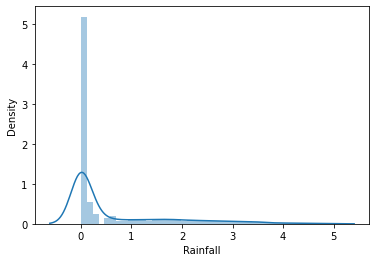

In [42]:
#Let's plot displot of 'Rainfall' column
sns.distplot(df.Rainfall)
#we can see that the graph has changed with data

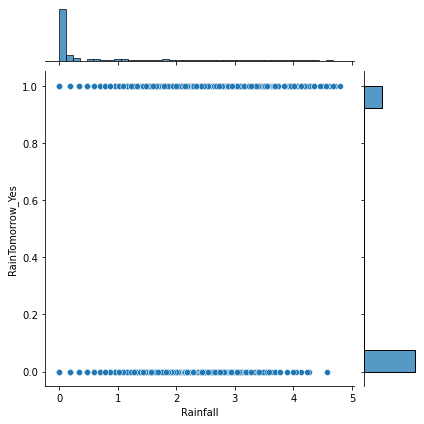

In [43]:
#Let's plot scatter plot of 'Rainfall' and 'RainTomorrow_Yes' columns
sns.jointplot(x='Rainfall',y='RainTomorrow_Yes',data=df)

C:\Users\KALLEPU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rainfall'>

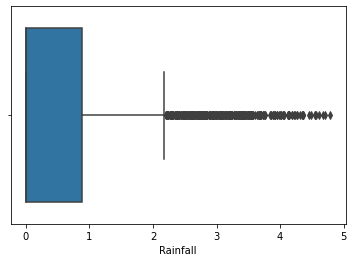

In [44]:
#Let's plot box plot of 'Rainfall' data
sns.boxplot(df['Rainfall'])
#we can see that the data is more linear with dependant variable now

In [45]:
#Printing updated skewness of 'Rainfall'
print('updated skewness of Rainfall =',skew(df['Rainfall']))

updated skewness of Rainfall = 1.7409276987687525


In [46]:
#Let's check the correlation of variables with each other in df
df.corr()

Rainfall  Evaporation  Sunshine  Avg_Humidity  Avg_Pressure  \
Rainfall          1.000000    -0.206804 -0.390435      0.443088      0.011873   
Evaporation      -0.206804     1.000000  0.174467     -0.266144     -0.326214   
Sunshine         -0.390435     0.174467  1.000000     -0.590462     -0.071083   
Avg_Humidity      0.443088    -0.266144 -0.590462      1.000000      0.234312   
Avg_Pressure      0.011873    -0.326214 -0.071083      0.234312      1.000000   
Avg_Cloud         0.334375    -0.041993 -0.745080      0.516801     -0.009590   
Avg_Temp         -0.132572     0.568649  0.231841     -0.102875     -0.413743   
Med_Temp         -0.085550     0.572336  0.137973     -0.000524     -0.419059   
RainToday_Yes     0.881982    -0.228791 -0.367080      0.407017      0.028742   
RainTomorrow_Yes  0.370418    -0.064301 -0.521637      0.442395     -0.010834   

                  Avg_Cloud  Avg_Temp  Med_Temp  RainToday_Yes  \
Rainfall           0.334375 -0.132572 -0.085550       0.881982   
Evaporation       -0.041993  0.568649  0.572336      -0.228791   
Sunshine          -0.745080  0.231841  0.137973      -0.367080   
Avg_Humidity       0.516801 -0.102875 -0.000524       0.407017   
Avg_Pressure      -0.009590 -0.413743 -0.419059       0.028742   
Avg_Cloud          1.000000 -0.015282  0.064780       0.322300   
Avg_Temp          -0.015282  1.000000  0.976504      -0.134279   
Med_Temp           0.064780  0.976504  1.000000      -0.089438   
RainToday_Yes      0.322300 -0.134279 -0.089438       1.000000   
RainTomorrow_Yes   0.413113 -0.092813 -0.036044       0.340894   

                  RainTomorrow_Yes  
Rainfall                  0.370418  
Evaporation              -0.064301  
Sunshine                 -0.521637  
Avg_Humidity              0.442395  
Avg_Pressure             -0.010834  
Avg_Cloud                 0.413113  
Avg_Temp                 -0.092813  
Med_Temp                 -0.036044  
RainToday_Yes             0.340894  
RainTomorrow_Yes          1.000000

#### Two or more independant variables should not have high correlation with each other as it impacts the output of data. Here we can see that variables 'Med_Temp' and 'Avg_Temp' have high correlation of '0.976504' which is unwanted. So one of the variable must be removed.

In [47]:
#the variable with low correlation towards output must be deleted 
del df['Med_Temp']
#so 'Med_Temp' variable is deleted and 'Avg_Temp' variable is retained

# Training Classification Models:

## Simple Logistic Regression

Simple Logistic Regression model using Scikit learn library.

In [48]:
#creating 2D variable named 'x' with independant variable 'Avg_Humidity' data in it 
x=df[['Avg_Humidity']]

In [49]:
#creating 1D variable named 'x' with dependant variable 'RainTomorrow_Yes' data in it 
y=df['RainTomorrow_Yes']

In [50]:
x.head()
#represnting 5 rows of data in 'x'

Avg_Humidity
0          88.0
1          78.0
2          87.0
3          86.5
4          81.0

In [51]:
y.head()
#represnting 5 rows of data in 'x'

0    1
1    1
2    1
3    1
4    1
Name: RainTomorrow_Yes, dtype: uint8

In [52]:
#creating a Logistic regression model object named 'clf_clr'
clf_slr=LogisticRegression()

In [53]:
clf_slr.fit(x,y)
#fit the model with data

LogisticRegression()

In [54]:
#printing intercept and coefficient of the model
print('Intercept : ', clf_slr.intercept_)
print('Coefficient : ', clf_slr.coef_)

Intercept :  [-7.31657135]
Coefficient :  [[0.09594652]]


Simple Logistic Regression using statsmodel library.  It uses Maximum Likelihood method(MLE)

In [55]:
#creating a new 2D variable with 'x' variable data and constant data
x_cons=sn.add_constant(x)
#the above command creates variable named 'x_cons' and the function equates the 'x' data and adds constant data to it

C:\Users\KALLEPU\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [56]:
x_cons.head()
#representing 5 rows of data in 'x_cons'

const  Avg_Humidity
0    1.0          88.0
1    1.0          78.0
2    1.0          87.0
3    1.0          86.5
4    1.0          81.0

In [57]:
#creating logistic regression model object named 'slogit' and fit the data into it
slogit=sm.Logit(y,x_cons).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\KALLEPU\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\KALLEPU\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [58]:
#get the summary of the data
slogit.summary()

C:\Users\KALLEPU\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\KALLEPU\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       RainTomorrow_Yes   No. Observations:                 3337
Model:                          Logit   Df Residuals:                     3335
Method:                           MLE   Df Model:                            1
Date:                Thu, 14 Mar 2024   Pseudo R-squ.:                     inf
Time:                        13:38:46   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.3167      0.289    -25.332      0.000      -7.883      -6.751
Avg_Humidity     0.0959      0.004     22.847      0.000       0.088       0.104
================================================================================
"""

In [59]:
#Above we can see intercept, coefficient of the data and other valuable information about the model

## Multiple Logistic Regression

Multiple Logistic Regression model using Scikit learn library.

In [60]:
#creating variable named 'x_multi' with all independant variables data
x_multi=df.drop('RainTomorrow_Yes', axis=1)
#above command drops 'RainTomorrow_Yes' column and equates df data to newly created variable 'x_multi'

In [61]:
x_multi.head()
#representing 5 rows of 'x_multi'

Rainfall  Evaporation  Sunshine  Avg_Humidity  Avg_Pressure  Avg_Cloud  \
0  2.809403     6.200000       0.0          88.0       1017.50        8.0   
1  1.945910     3.400000       2.7          78.0       1017.15        7.0   
2  2.028148     2.400000       0.1          87.0       1016.15        7.5   
3  2.985682     2.200000       0.0          86.5       1013.00        8.0   
4  4.361824     5.187432       0.0          81.0       1006.55        8.0   

   Avg_Temp  RainToday_Yes  
0     20.80              1  
1     23.60              1  
2     23.25              1  
3     21.15              1  
4     24.00              1

In [62]:
#creating variable named 'y_multi' with dependant variable data
y_multi=df['RainTomorrow_Yes']
#Above command equates newly created column to 'RainTomorrow_Yes' data

In [63]:
y_multi.head()
#Representing 5 rows of 'y_multi'

0    1
1    1
2    1
3    1
4    1
Name: RainTomorrow_Yes, dtype: uint8

In [64]:
#Creating Logistic regression model object
clf_lr=LogisticRegression()

In [65]:
#fit the model with data
clf_lr.fit(x_multi,y_multi)

C:\Users\KALLEPU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
#Printing the coefficients of the variables
print('Coefficents :',clf_lr.coef_)

Coefficents : [[ 0.29818509  0.08151936 -0.21199103  0.04593907 -0.00338083  0.06637476
  -0.01327287  0.12298394]]


In [67]:
#Printing the intercept
print('Intercepts :',clf_lr.intercept_)

Intercepts : [0.00169051]


Multiple Logistic Regression using statsmodel library.  It uses Maximum Likelihood method(MLE)

In [68]:
#creating a new variable with 'x_multi' variable data and constant data
x_multi_cons=sn.add_constant(x_multi)
#the above command creates variable named 'x_mutli_cons' and the function equates the 'x_multi' data and adds constant data to it

C:\Users\KALLEPU\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [69]:
x_multi_cons.head()
#viewing first 5 rows of 'x_multi_cons'

const  Rainfall  Evaporation  Sunshine  Avg_Humidity  Avg_Pressure  \
0    1.0  2.809403     6.200000       0.0          88.0       1017.50   
1    1.0  1.945910     3.400000       2.7          78.0       1017.15   
2    1.0  2.028148     2.400000       0.1          87.0       1016.15   
3    1.0  2.985682     2.200000       0.0          86.5       1013.00   
4    1.0  4.361824     5.187432       0.0          81.0       1006.55   

   Avg_Cloud  Avg_Temp  RainToday_Yes  
0        8.0     20.80              1  
1        7.0     23.60              1  
2        7.5     23.25              1  
3        8.0     21.15              1  
4        8.0     24.00              1

In [70]:
#creating logistic regression model object named 'mlogit' and fit the data into it
mlogit=sm.Logit(y_multi,x_multi_cons).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\KALLEPU\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\KALLEPU\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [71]:
mlogit.summary()
#get the summary of the model

C:\Users\KALLEPU\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\KALLEPU\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       RainTomorrow_Yes   No. Observations:                 3337
Model:                          Logit   Df Residuals:                     3328
Method:                           MLE   Df Model:                            8
Date:                Thu, 14 Mar 2024   Pseudo R-squ.:                     inf
Time:                        13:39:12   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            31.2750      7.990      3.914      0.000      15.615      46.935
Rainfall          0.2211      0.092      2.401      0.016       0.041       0.402
Evaporation       0.0781      0.022      3.536      0.000       0.035       0.121
Sunshine         -0.2118      0.021    -10.250      0.000      -0.252      -0.171
Avg_Humidity      0.0493      0.005      9.340      0.000       0.039       0.060
Avg_Pressure     -0.0339      0.008     -4.334      0.000      -0.049      -0.019
Avg_Cloud         0.0546      0.036      1.502      0.133      -0.017       0.126
Avg_Temp         -0.0343      0.015     -2.228      0.026      -0.064      -0.004
RainToday_Yes     0.2814      0.212      1.327      0.185      -0.134       0.697
=================================================================================
"""

we can see the intercept value and coefficient values of the model. Other information is also represented which might be useful

## Train and Test split of the data:

For correct evaluation of the classification models we need to split the data into training and testing data. The appropriate model can be choosed based on the accuracy of prediction of output values of the test data.

In [72]:
#splitting data into 80% to training data and 20% to test data using train_test_split method
x_train,x_test,y_train,y_test=train_test_split(x_multi,y_multi,test_size=0.2,random_state=0)
#The input and output train data is stored in 'x_train' and 'y_train' variables respectively
#The input and output test data is stored in 'x_test' and 'y_test' variables respectively

In [73]:
#Printing the shape of training and testing variables 
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2669, 8) (668, 8) (2669,) (668,)


## Multiple Logistic Regression

Multiple Logistic Regression model using Scikit learn library.

In [74]:
#Creating Logistic regression model object named 'clf_lrt'
clf_lrt=LogisticRegression()

In [75]:
clf_lrt.fit(x_train,y_train)
#fit the model with training data

C:\Users\KALLEPU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
print('Coefficents :',clf_lrt.coef_)
#print the coefficients of variables using the model

Coefficents : [[ 0.30038474  0.07620457 -0.19528401  0.04334572 -0.00337561  0.11667615
  -0.02052527  0.12769348]]


In [77]:
print('Intercepts :',clf_lrt.intercept_)
#print the intercept using the model

Intercepts : [0.00170705]


Multiple Logistic Regression using statsmodel library. It uses Maximum Likelihood method(MLE)

In [78]:
#creating a new variable with 'x_train_cons' variable data and constant data
x_train_cons=sn.add_constant(x_train)
#the above command creates variable named 'x_train_cons' and the function equates the 'x_train' data and adds constant data to it

C:\Users\KALLEPU\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [79]:
x_train_cons.head()
#viewing first 5 rows of 'x_train_cons'

const  Rainfall  Evaporation  Sunshine  Avg_Humidity  Avg_Pressure  \
245     1.0  0.000000          8.6       9.8          30.5     1012.5500   
2258    1.0  0.000000          2.6       9.4          35.5     1003.6000   
242     1.0  0.587787          6.4      11.1          54.5     1018.5385   
2747    1.0  2.954910          9.0       0.0          75.5     1013.9000   
2982    1.0  0.182322          4.4       4.8          50.5     1003.5000   

      Avg_Cloud  Avg_Temp  RainToday_Yes  
245         4.0     31.75              0  
2258        0.5     16.30              0  
242         1.5     17.75              0  
2747        8.0     18.80              1  
2982        6.0     14.40              0

In [80]:
#creating logistic regression model object named 'tlogit' and fit the training data into it
tlogit=sm.Logit(y_train,x_train_cons).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\KALLEPU\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\KALLEPU\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [81]:
tlogit.summary()
#get the summary of the model

C:\Users\KALLEPU\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\KALLEPU\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       RainTomorrow_Yes   No. Observations:                 2669
Model:                          Logit   Df Residuals:                     2660
Method:                           MLE   Df Model:                            8
Date:                Thu, 14 Mar 2024   Pseudo R-squ.:                     inf
Time:                        13:39:25   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            30.2482      8.921      3.391      0.001      12.764      47.733
Rainfall          0.2094      0.103      2.035      0.042       0.008       0.411
Evaporation       0.0754      0.025      3.072      0.002       0.027       0.123
Sunshine         -0.1971      0.023     -8.562      0.000      -0.242      -0.152
Avg_Humidity      0.0465      0.006      7.930      0.000       0.035       0.058
Avg_Pressure     -0.0328      0.009     -3.763      0.000      -0.050      -0.016
Avg_Cloud         0.1007      0.041      2.486      0.013       0.021       0.180
Avg_Temp         -0.0412      0.017     -2.402      0.016      -0.075      -0.008
RainToday_Yes     0.3249      0.237      1.369      0.171      -0.140       0.790
=================================================================================
"""

Above we can see the intercept and coefficient values of the model

### Prediction:

In [82]:
#predicting the output variable of x_train data using multiple logistic regression object 'clf_lrt'
#storing it in new variable named 'y_pred_lrtr'
y_pred_lrtr=clf_lrt.predict(x_train)

In [83]:
#drawing a confusion matrix of train data
confusion_matrix(y_train,y_pred_lrtr)

array([[1805,  157],
       [ 321,  386]], dtype=int64)

In [84]:
#predicting the output variable of x_test data using multiple logistic regression object 'clf_lrt'
#storing it in new variable named 'y_pred_lrts'
y_pred_lrts=clf_lrt.predict(x_test)

### Evaluation:

In [85]:
# accuracy score of traindata by using the model
accuracy_score(y_train,y_pred_lrtr)

0.8209067066316973

In [86]:
#precision of train data by using the model
precision_score(y_train,y_pred_lrtr)

0.7108655616942909

In [87]:
#recall score of the train data by using the model
recall_score(y_train,y_pred_lrtr)

0.545968882602546

In [88]:
#roc score oftrain data by using the model
roc_auc_score(y_train,y_pred_lrtr)

0.7329742476213545

In [89]:
#drawing a confusion matrix of test data
confusion_matrix(y_test,y_pred_lrts)

array([[473,  37],
       [ 77,  81]], dtype=int64)

In [90]:
# accuracy score of test data using the model
accuracy_score(y_test,y_pred_lrts)

0.8293413173652695

In [91]:
#precision of test data by using the model
precision_score(y_test,y_pred_lrts)

0.6864406779661016

In [92]:
#recall score of the test data by using the model
recall_score(y_test,y_pred_lrts)

0.5126582278481012

In [93]:
#roc score of test data by using the model
roc_auc_score(y_test,y_pred_lrts)

0.7200546041201292

## Linear Discriminant Analysis

In [94]:
#Creating LDA model object named 'clf_lda'
clf_lda=LinearDiscriminantAnalysis()

In [95]:
#fit the model with the train data
clf_lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

### Prediction:

In [96]:
#predicting output variables of train data using the model
y_pred_ldatr=clf_lda.predict(x_train)

### Accuracy:

In [97]:
#drawing the confusion matrix of train data
confusion_matrix(y_train,y_pred_ldatr)

array([[1774,  188],
       [ 301,  406]], dtype=int64)

In [98]:
#accuracy score of train data by using the model
accuracy_score(y_train,y_pred_ldatr)

0.8167853128512551

In [99]:
#precision score of train data by using the model
precision_score(y_train,y_pred_ldatr)

0.6835016835016835

In [100]:
#recall score of train data by using the model
recall_score(y_train,y_pred_ldatr)

0.5742574257425742

In [101]:
#roc score of train data by using the model
roc_auc_score(y_train,y_pred_ldatr)

0.7392184172545695

In [102]:
#predicting output variables of test data using the model
y_pred_ldats=clf_lda.predict(x_test)

In [103]:
#drawing the confusion matrix of test data
confusion_matrix(y_test,y_pred_ldats)

array([[470,  40],
       [ 71,  87]], dtype=int64)

In [104]:
#accuracy score of test data by using the model
accuracy_score(y_test,y_pred_ldats)

0.8338323353293413

In [105]:
#precision score of test data by using the model
precision_score(y_test,y_pred_ldats)

0.6850393700787402

In [106]:
#recall score of test data by using the model
recall_score(y_test,y_pred_ldats)

0.5506329113924051

In [107]:
#roc score of test data by using the model
roc_auc_score(y_test,y_pred_ldats)

0.7361007694216929

## KNN Classifier

For training a KNN classifier model the input variables needs to be scaled

In [108]:
#we create a scaler object and fit the input train data using standard scaler function
scaler=preprocessing.StandardScaler().fit(x_train)

In [109]:
#we scale the x_train variable data using scaler object and tranform function
#now equate it to newly created variable x_train_s
x_train_s=scaler.transform(x_train)

In [110]:
#we create a scaler object and fit the input test data using standard scaler function
scaler=preprocessing.StandardScaler().fit(x_test)

In [111]:
#we scale the x_test variable data using scaler object and tranform function
#now equate it to newly created variable x_test_s
x_test_s=scaler.transform(x_test)

In [112]:
#Creating KNN classifier model object named 'clf_knn1' with 1 nearest neighbors
clf_knn1=KNeighborsClassifier(n_neighbors=1)

In [113]:
#fit the model with the scaled input train data and output train data
clf_knn1.fit(x_train_s,y_train)

KNeighborsClassifier(n_neighbors=1)

### Evaluation:

In [114]:
#drawing a confusion matrix of train data using the model
confusion_matrix(y_train,clf_knn1.predict(x_train_s))

array([[1962,    0],
       [   0,  707]], dtype=int64)

In [115]:
#accuracy score of train data by using the model
accuracy_score(y_train,clf_knn1.predict(x_train_s))

1.0

In [116]:
#drawing a confusion matrix of test data using the model
confusion_matrix(y_test,clf_knn1.predict(x_test_s))

array([[404, 106],
       [ 73,  85]], dtype=int64)

In [117]:
#accuracy score of test data by using the model
accuracy_score(y_test,clf_knn1.predict(x_test_s))

0.7320359281437125

In [118]:
#precision score of test data by using the model
precision_score(y_test,clf_knn1.predict(x_test_s))

0.44502617801047123

In [119]:
#recall score of test data by using the model
recall_score(y_test,clf_knn1.predict(x_test_s))

0.5379746835443038

In [120]:
#roc score of test data by using the model
roc_auc_score(y_test,clf_knn1.predict(x_test_s))

0.665065773144701

The nearest neighbors can be of any value. So to find the better model out of it we give set of nearest neighbors and filter it using Grid search.

In [121]:
#creating a dictionary named 'params' with a set of nearest neighbor values
params={'n_neighbors':[2,3,4,5,6,7,8,9,10]}
#we are creating values from 2 to 10

In [122]:
#creating gridsearch object of Knn classifier and 'params'
gridsearch=GridSearchCV(KNeighborsClassifier(),params)

In [123]:
#fit the model with data
gridsearch.fit(x_train_s,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [124]:
#find out the best parameter value from given values using best_params_ function
gridsearch.best_params_
#the best parameter value is '10'

{'n_neighbors': 10}

In [125]:
#create a new knn classifier object using the best estimator which has the best parameter value
optimised_knn=gridsearch.best_estimator_

### Prediction:

In [126]:
#predicting output variables of test data using the model
y_pred_knn=optimised_knn.predict(x_test_s)

### Evaluation:

In [127]:
#draw a confusion matrix of test data using the model
confusion_matrix(y_test,y_pred_knn)

array([[483,  27],
       [ 88,  70]], dtype=int64)

In [128]:
#Accuracy score of test data using the model
accuracy_score(y_test,y_pred_knn)

0.8278443113772455

In [129]:
#precision score of test data by using the model
precision_score(y_test,y_pred_knn)

0.7216494845360825

In [130]:
#recall score of test data by using the model
recall_score(y_test,y_pred_knn)

0.4430379746835443

In [131]:
#roc score of test data by using the model
roc_auc_score(y_test,y_pred_knn)

0.695048399106478

## Decision Tree Classifier:

Decision Tree with max_depth attribute

In [132]:
#Creating Decision Tree classifier model object named 'clftree1' with maximum tree depth as 3
clftree1=tree.DecisionTreeClassifier(max_depth=3)

In [133]:
#fit the model with the data
clftree1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

### Prediction:

In [134]:
#predicting output variables of train data using the model
y_pred_ttr=clftree1.predict(x_train)

In [135]:
#predicting output variables of test data using the model
y_pred_tts=clftree1.predict(x_test)

### Evaluation:

In [136]:
#draw a confusion matrix of train data using the model
confusion_matrix(y_train,y_pred_ttr)

array([[1850,  112],
       [ 360,  347]], dtype=int64)

In [137]:
#draw a confusion matrix of test data using the model
confusion_matrix(y_test,y_pred_tts)

array([[479,  31],
       [ 88,  70]], dtype=int64)

In [138]:
#Accuracy score of test data using the model
accuracy_score(y_test,y_pred_tts)

0.8218562874251497

In [139]:
#precision score of test data by using the model
precision_score(y_test,y_pred_tts)

0.693069306930693

In [140]:
#recall score of test data by using the model
recall_score(y_test,y_pred_tts)

0.4430379746835443

In [141]:
#roc score of test data by using the model
roc_auc_score(y_test,y_pred_tts)

0.691126830479027

In [142]:
#we create a object named 'dot_data1' for containing dot data of decision tree using export graphviz 
#'feature_names' attribute represents variable names in the decision tree
#'filled=True' attribute indicates majority class for classification
#'out_file=None' gives result as string
dot_data1=tree.export_graphviz(clftree1,out_file=None,feature_names=x_train.columns,filled=True)

In [143]:
#exporting dot data as graph data into a object named 'graph1' using pydotplus
graph1=pydotplus.graph_from_dot_data(dot_data1)

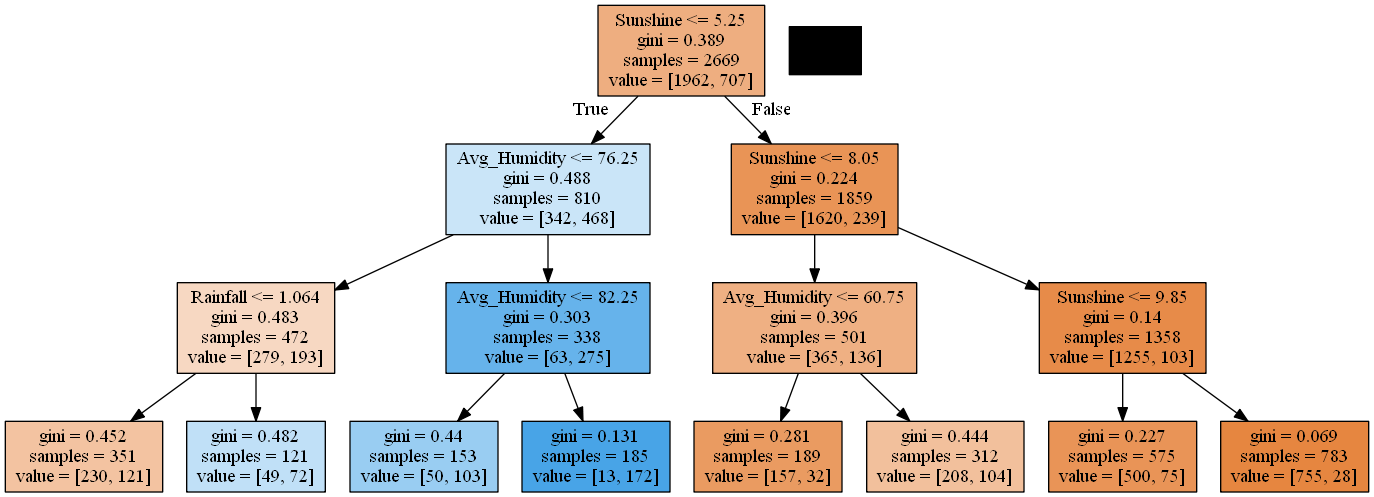

In [144]:
#representing the decision tree graph image
Image(graph1.create_png())

Decision Tree with min_samples_leaf and min_samples_split attribute

In [145]:
#Creating Decision Tree classifier model object named 'clftree2' with minimum leaf samples as 3 
#and minimum nodes spliting as 2
clftree2=tree.DecisionTreeClassifier(min_samples_leaf=3,min_samples_split=2)

In [146]:
#fir the model with train data
clftree2.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=3)

### Evaluation:

In [147]:
#draw a confusion matrix of train data using the model
confusion_matrix(y_train,clftree2.predict(x_train))

array([[1892,   70],
       [  99,  608]], dtype=int64)

In [148]:
#Accuracy score of train data using the model
accuracy_score(y_train,clftree2.predict(x_train))

0.9366804046459348

In [149]:
#precision score of train data by using the model
precision_score(y_train,clftree2.predict(x_train))

0.8967551622418879

In [150]:
#recall score of train data by using the model
recall_score(y_train,clftree2.predict(x_train))

0.85997171145686

In [151]:
#roc score of train data by using the model
roc_auc_score(y_train,clftree2.predict(x_train))

0.9121469158711416

In [152]:
#draw a confusion matrix of test data using the model
confusion_matrix(y_test,clftree2.predict(x_test))

array([[438,  72],
       [ 72,  86]], dtype=int64)

In [153]:
#Accuracy score of test data using the model
accuracy_score(y_test,clftree2.predict(x_test))

0.7844311377245509

In [154]:
#precision score of test data by using the model
precision_score(y_test,clftree2.predict(x_test))

0.5443037974683544

In [155]:
#recall score of test data by using the model
recall_score(y_test,clftree2.predict(x_test))

0.5443037974683544

In [156]:
#roc score of test data by using the model
roc_auc_score(y_test,clftree2.predict(x_test))

0.7015636634400596

In [157]:
#we create a object named 'dot_data2' for containing dot data of decision tree using export graphviz 
#'feature_names' attribute represents variable names in the decision tree
#'filled=True' attribute indicates majority class for classification
#'out_file=None' gives result as string
dot_data2=tree.export_graphviz(clftree2,out_file=None,feature_names=x_train.columns,filled=True)

In [158]:
#exporting dot data as graph data into a object named 'graph2' using pydotplus
graph2=pydotplus.graph_from_dot_data(dot_data2)

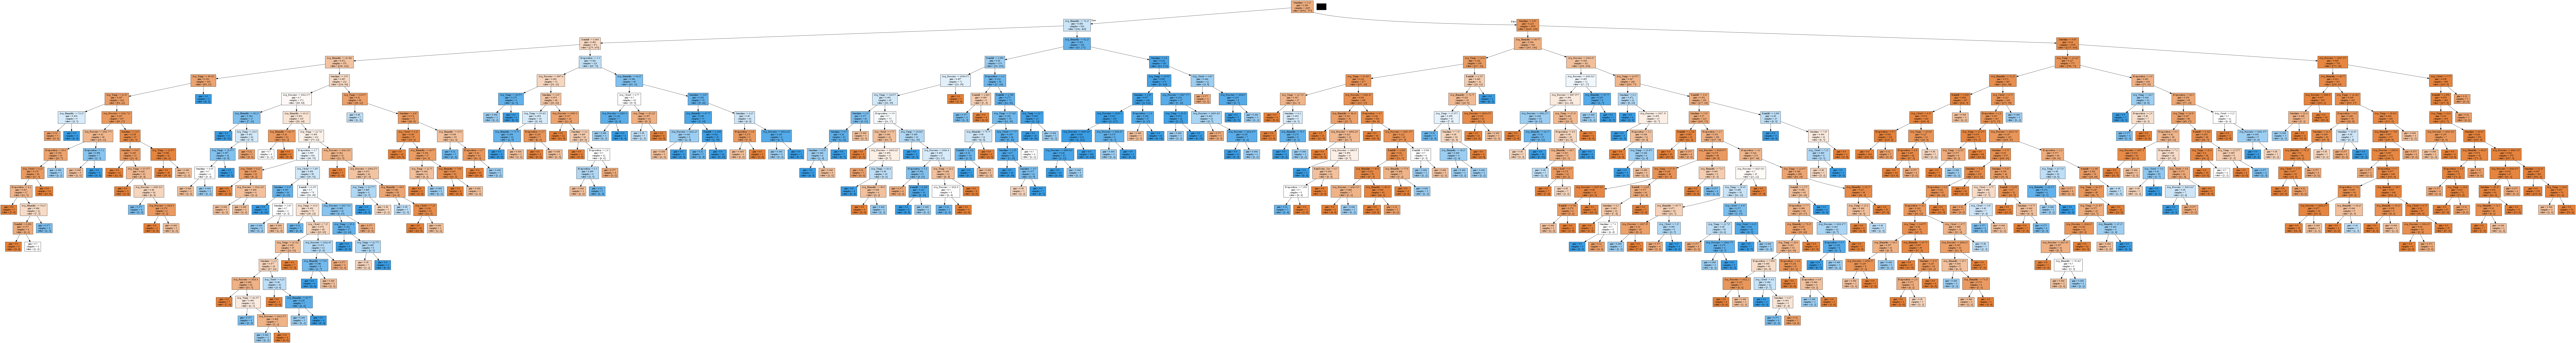

In [159]:
#representing the decision tree graph image
Image(graph2.create_png())

Decision Tree with min_samples_leaf and max_depth attribute

In [160]:
#Creating Decision Tree classifier model object named 'clftree3' with minimum leaf samples as 25 
#and maximum tree depth as 4
clftree3=tree.DecisionTreeClassifier(min_samples_leaf=25,max_depth=4)

In [161]:
#fit the model with train data
clftree3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=25)

### Evaluation:

In [162]:
#draw a confusion matrix of train data using the model
confusion_matrix(y_train,clftree3.predict(x_train))

array([[1856,  106],
       [ 354,  353]], dtype=int64)

In [163]:
#draw a confusion matrix of test data using the model
confusion_matrix(y_test,clftree3.predict(x_test))

array([[474,  36],
       [ 90,  68]], dtype=int64)

In [164]:
#Accuracy score of test data using the model
accuracy_score(y_test,clftree3.predict(x_test))

0.811377245508982

In [165]:
#precision score of test data by using the model
precision_score(y_test,clftree3.predict(x_test))

0.6538461538461539

In [166]:
#recall score of test data by using the model
recall_score(y_test,clftree3.predict(x_test))

0.43037974683544306

In [167]:
#roc score of test data by using the model
roc_auc_score(y_test,clftree3.predict(x_test))

0.6798957557706627

In [168]:
#we create a object named 'dot_data3' for containing dot data of decision tree using export graphviz 
#'feature_names' attribute represents variable names in the decision tree
#'filled=True' attribute indicates majority class for classification
#'out_file=None' gives result as string
dot_data3=tree.export_graphviz(clftree3,out_file=None,feature_names=x_train.columns,filled=True)

In [169]:
#exporting dot data as graph data into a object named 'graph3' using pydotplus
graph3=pydotplus.graph_from_dot_data(dot_data3)

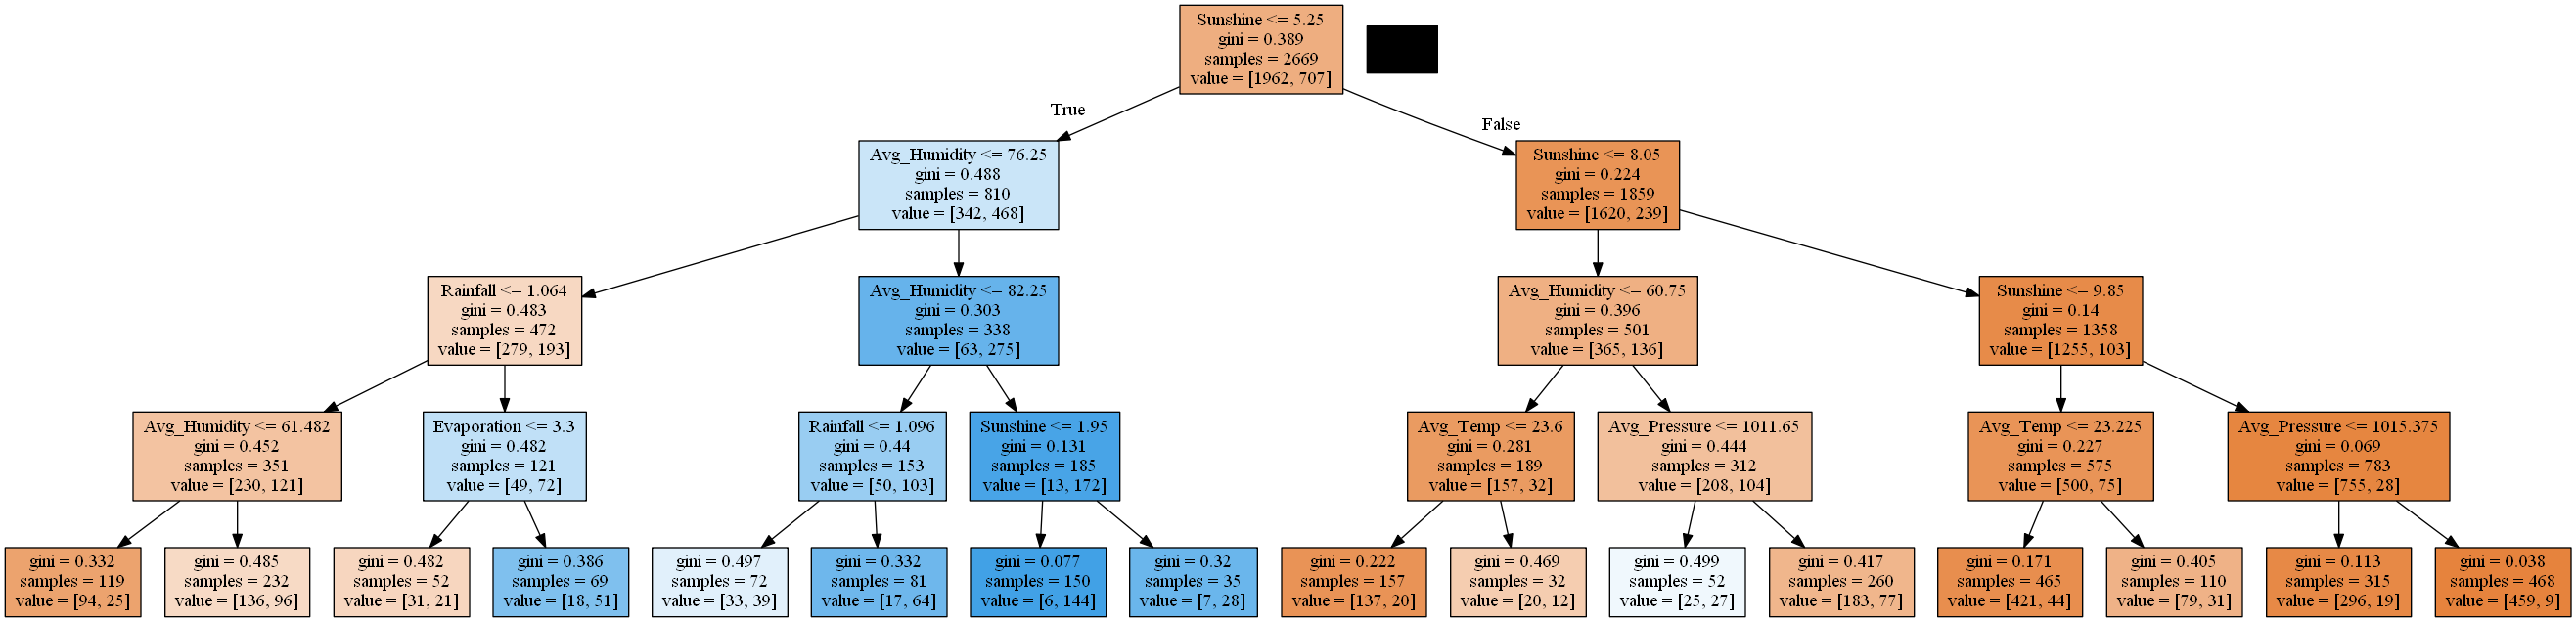

In [170]:
#representing the decision tree graph image
Image(graph3.create_png())

Out of all the Decision Tree classifiers models we can say that 'clftree1' is more accurate based on accuracy score of testing data

So to make it more reliable we use ensemble techniques

## 1)Bagging

In [171]:
#Initialize the BaggingClassifier with DecisionTreeClassifier 'clftree1' as the base estimator and other attributes
bag_clf=BaggingClassifier(base_estimator=clftree1,n_estimators=1000,bootstrap=True,n_jobs=-1,random_state=42)

In [172]:
#fit the model with train data
bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=1000, n_jobs=-1, random_state=42)

### Evaluation:

In [173]:
#draw a confusion matrix of train data using the model
confusion_matrix(y_train,bag_clf.predict(x_train))

array([[1876,   86],
       [ 379,  328]], dtype=int64)

In [174]:
#draw a confusion matrix of test data using the model
confusion_matrix(y_test,bag_clf.predict(x_test))

array([[488,  22],
       [ 89,  69]], dtype=int64)

In [175]:
#Accuracy score of test data using the model
accuracy_score(y_test,bag_clf.predict(x_test))

0.8338323353293413

In [176]:
#precision score of test data by using the model
precision_score(y_test,bag_clf.predict(x_test))

0.7582417582417582

In [177]:
#recall score of test data by using the model
recall_score(y_test,bag_clf.predict(x_test))

0.43670886075949367

In [178]:
#roc score of test data by using the model
roc_auc_score(y_test,bag_clf.predict(x_test))

0.6967858029287666

## 2)Random Forest

In [179]:
# Initialize the RandomForestClassifier model object 'rf_clf'
rf_clf=RandomForestClassifier(n_estimators=1000,n_jobs=-1,random_state=42)

In [180]:
#fit the model with the train data
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

### Evaluation:

In [181]:
#draw a confusion matrix of train data using the model
confusion_matrix(y_train,rf_clf.predict(x_train))

array([[1962,    0],
       [   0,  707]], dtype=int64)

In [182]:
#draw a confusion matrix of test data using the model
confusion_matrix(y_test,rf_clf.predict(x_test))

array([[472,  38],
       [ 81,  77]], dtype=int64)

In [183]:
#Accuracy score of test data using the model
accuracy_score(y_test,rf_clf.predict(x_test))

0.8218562874251497

In [184]:
#precision score of test data by using the model
precision_score(y_test,rf_clf.predict(x_test))

0.6695652173913044

In [185]:
#recall score of test data by using the model
recall_score(y_test,rf_clf.predict(x_test))

0.4873417721518987

In [186]:
#roc score of test data by using the model
roc_auc_score(y_test,rf_clf.predict(x_test))

0.706415984115165

Experimenting with parameters using Gridsearch in Random forest model 

In [187]:
# Initialize the RandomForestClassifier object named 'rf_clfn'
rf_clfn=RandomForestClassifier(n_estimators=250,random_state=42)

In [188]:
# range of different parameters for the model
param_grid={'max_features':[4,5,6,7,8,9,10],
           'min_samples_split':[2,3,10]
           }

In [189]:
#creating gridsearch object of randome forest classifier and 'param_grid'
grid_search=GridSearchCV(rf_clfn,param_grid,n_jobs=-1,cv=5,scoring='accuracy')

creating gridsearch object with different range of parameter values which has 'rf_clfn' classifier as base estimator and scoring as accuracy

In [190]:
#fit the model with train data
grid_search.fit(x_train,y_train)

C:\Users\KALLEPU\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.82128859 0.82203976 0.82353367 0.82241218 0.81828882 0.82465656
 0.82091124 0.82241078 0.82053952 0.82203273 0.81941452 0.82391031
 0.82241148 0.82128718 0.82278531        nan        nan        nan
        nan        nan        nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [191]:
#Finding the best model parameter values using best_params_ function
grid_search.best_params_

{'max_features': 5, 'min_samples_split': 10}

In [192]:
#creating a randomforest classifer model with best parameter values using best_estimator_ function
rf_clf_best=grid_search.best_estimator_

### Evaluation:

In [193]:
#draw a confusion matrix of train data using the model
confusion_matrix(y_train,rf_clf_best.predict(x_train))

array([[1941,   21],
       [ 123,  584]], dtype=int64)

In [194]:
#Accuracy score of train data using the model
accuracy_score(y_train,rf_clf_best.predict(x_train))

0.9460472086923941

In [195]:
#draw a confusion matrix of test data using the model
confusion_matrix(y_test,rf_clf_best.predict(x_test))

array([[475,  35],
       [ 78,  80]], dtype=int64)

In [196]:
#Accuracy score of test data using the model
accuracy_score(y_test,rf_clf_best.predict(x_test))

0.8308383233532934

In [197]:
#precision score of test data by using the model
precision_score(y_test,rf_clf_best.predict(x_test))

0.6956521739130435

In [198]:
#recall score of test data by using the model
recall_score(y_test,rf_clf_best.predict(x_test))

0.5063291139240507

In [199]:
#roc score of test data by using the model
roc_auc_score(y_test,rf_clf_best.predict(x_test))

0.7188508314718293

## 3)Boosting

### i)Ada Boost Classifier

In [200]:
# Initialize the AdaBoostClassifier object named 'ada_clf1'
ada_clf1=AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [201]:
#fit the model using train data
ada_clf1.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

### Evaluation:

In [202]:
#draw a confusion matrix of test data using the model
confusion_matrix(y_test,ada_clf1.predict(x_test))

array([[478,  32],
       [ 81,  77]], dtype=int64)

In [203]:
#Accuracy score of test data using the model
accuracy_score(y_test,ada_clf1.predict(x_test))

0.8308383233532934

In [204]:
#precision score of test data by using the model
precision_score(y_test,ada_clf1.predict(x_test))

0.7064220183486238

In [205]:
#recall score of test data by using the model
recall_score(y_test,ada_clf1.predict(x_test))

0.4873417721518987

In [206]:
#roc score of test data by using the model
roc_auc_score(y_test,ada_clf1.predict(x_test))

0.7122983370563415

In [ ]:
#Initialize the AdaBoostClassifier with BaggingClassifier 'bag_clf' as the base estimator and other attributes

In [207]:
ada_clf2=AdaBoostClassifier(bag_clf,learning_rate=0.05, n_estimators=500)

In [208]:
#fit the model with train data
ada_clf2.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                                                    n_estimators=1000,
                                                    n_jobs=-1,
                                                    random_state=42),
                   learning_rate=0.05, n_estimators=500)

### Evaluation:

In [210]:
#draw a confusion matrix of test data using the model
confusion_matrix(y_test,ada_clf2.predict(x_test))

array([[476,  34],
       [ 82,  76]], dtype=int64)

In [537]:
#Accuracy score of test data using the model
accuracy_score(y_test,ada_clf2.predict(x_test))

0.8263473053892215

In [538]:
#precision score of test data by using the model
precision_score(y_test,ada_clf2.predict(x_test))

0.6909090909090909

In [211]:
#recall score of test data by using the model
recall_score(y_test,ada_clf2.predict(x_test))

0.4810126582278481

In [212]:
#roc score of test data by using the model
roc_auc_score(y_test,ada_clf2.predict(x_test))

0.7071729957805907

### ii) XGBoost Classifier

In [496]:
# Initialize the XGBoostClassifier object named 'xgb_clf' with attributes
xgb_clf=xgb.XGBClassifier(max_depth=5,n_estimators=10000,learning_rate=0.3,n_jobs=-1)

In [497]:
#fit the model with the train data
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Prediction:

In [498]:
#predicting the output variable of x_train data using xgboost classifier object 'xgb_clf'
#storing it in new variable named 'y_pred_xgb'
y_pred_xgb=xgb_clf.predict(x_test)

### Evaluation:

In [499]:
#draw a confusion matrix of test data using the model
confusion_matrix(y_test,y_pred_xgb)

array([[451,  59],
       [ 72,  86]], dtype=int64)

In [500]:
#Accuracy score of test data using the model
accuracy_score(y_test,y_pred_xgb)

0.8038922155688623

In [501]:
#precision score of test data by using the model
precision_score(y_test,y_pred_xgb)

0.593103448275862

In [502]:
#recall score of test data by using the model
recall_score(y_test,y_pred_xgb)

0.5443037974683544

In [503]:
#roc score of test data by using the model
roc_auc_score(y_test,y_pred_xgb)

0.7143087614792752

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

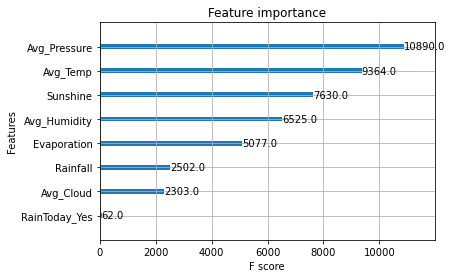

In [504]:
#plotting a graph showing importance of each variable in the dataframe based on the model
xgb.plot_importance(xgb_clf)

In [505]:
# Initialize the XGBoostClassifier object named 'xgb_clfn' with attributes
xgb_clfn=xgb.XGBClassifier(n_estimators=500,learning_rate=0.1,random_state=42)

In [506]:
# range of different parameters for the model
param_test={
    'max_depth':range(3,10,2),
    'gamma':[0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[1e-2,0.1,1]
}

In [507]:
#creating gridsearch object of xgboost classifier and 'param_test'
grid_search_cv=GridSearchCV(xgb_clfn,param_test,n_jobs=-1,cv=5,scoring='accuracy')

In [508]:
#fit the model with train data
grid_search_cv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [509]:
#Finfing the best model parameter values using best_params_ fuction
grid_search_cv.best_params_  

{'colsample_bytree': 0.9,
 'gamma': 0.2,
 'max_depth': 3,
 'reg_alpha': 0.01,
 'subsample': 0.9}

In [510]:
#creating a xgboost classifier model with best parameter values using best_estimatoer_ function
xgb_clf_best=grid_search_cv.best_estimator_

### Evaluation:

In [512]:
#draw a confusion matrix of test data using the model
confusion_matrix(y_test,xgb_clf_best.predict(x_test))

array([[465,  45],
       [ 79,  79]], dtype=int64)

In [511]:
#Accuracy score of test data using the model
accuracy_score(y_test,xgb_clf_best.predict(x_test))

0.8143712574850299

In [513]:
#precision score of test data by using the model
precision_score(y_test,xgb_clf_best.predict(x_test))

0.6370967741935484

In [514]:
#recall score of test data by using the model
recall_score(y_test,xgb_clf_best.predict(x_test))

0.5

In [515]:
#roc score of test data by using the model
roc_auc_score(y_test,xgb_clf_best.predict(x_test))

0.7058823529411765

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

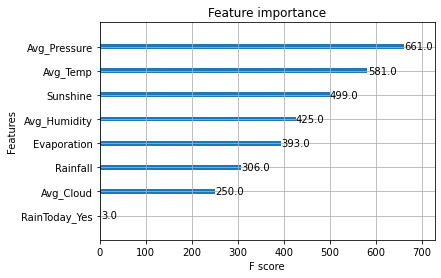

In [516]:
#plotting a graph showing importance of each variable in the dataframe based on the model
xgb.plot_importance(xgb_clf_best)